In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.cm as cm


In [2]:
threshold=1
brain_rna_tophat = pd.read_excel('../RNA-seq/Table_EV2.xlsx',sheet_name='B. Genes',index_col=0)['Brain']
brain_rna_tophat = brain_rna_tophat[brain_rna_tophat>1]
brain_rna_tophat.head()

Gene ID
ENSG00000000003    15.67
ENSG00000000419    14.85
ENSG00000000457     3.14
ENSG00000000971     1.32
ENSG00000001036     6.75
Name: Brain, dtype: float64

In [3]:
brain_protein = pd.read_excel('../RNA-seq/Table_EV1.xlsx',sheet_name='C. Genes',index_col=0)['Brain']
brain_protein = brain_protein[brain_protein>0]
brain_protein.head()

Gene ID
ENSG00000000003    7.492897e+06
ENSG00000000419    4.387436e+07
ENSG00000000457    9.726954e+05
ENSG00000000460    1.151876e+06
ENSG00000000971    7.024459e+07
Name: Brain, dtype: float64

In [4]:
brain_rna_RSEM = pd.read_csv('../RNA-seq.genes.results',sep='\t',index_col=0)['FPKM']
#Threshold FPKM > 1
brain_rna_RSEM = brain_rna_RSEM[brain_rna_RSEM>1]
brain_rna_RSEM.head()

gene_id
ENSG00000000003    19.85
ENSG00000000419    20.33
ENSG00000000457     5.56
ENSG00000000460     3.11
ENSG00000000938     1.59
Name: FPKM, dtype: float64

### Overlapping Genes

In [5]:
tophat_genes = set(brain_rna_tophat.index)&set(brain_protein.index)
len(tophat_genes)

9369

In [6]:
RSEM_genes = set(brain_rna_RSEM.index)&set(brain_protein.index)
len(RSEM_genes)

9807

### Plot for Tophat method

In [16]:
tips = sns.load_dataset("tips")

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
sns.set(style="white", color_codes=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


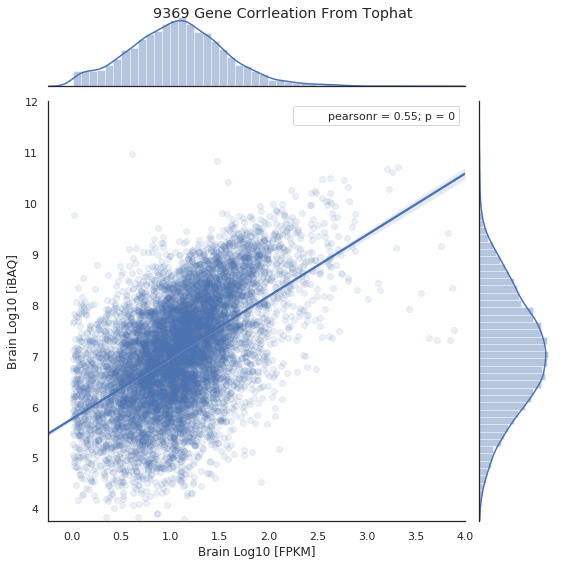

In [97]:
x = np.log10(brain_rna_tophat[tophat_genes])
y = np.log10(brain_protein[tophat_genes])
df= pd.concat([x, y], axis=1,)
df.columns = ['Brain Log10 [FPKM]','Brain Log10 [iBAQ]']


g = sns.jointplot("Brain Log10 [FPKM]", "Brain Log10 [iBAQ]", xlim=(-.25,4),ylim=(3.75,12),data=df,height=8, kind="reg",scatter_kws={'alpha':0.1})
g.annotate(stats.pearsonr)
g.fig.suptitle('9369 Gene Corrleation From Tophat')
g.savefig('Brain_tophat_cor')
plt.show()



### Plot for RSEM method

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


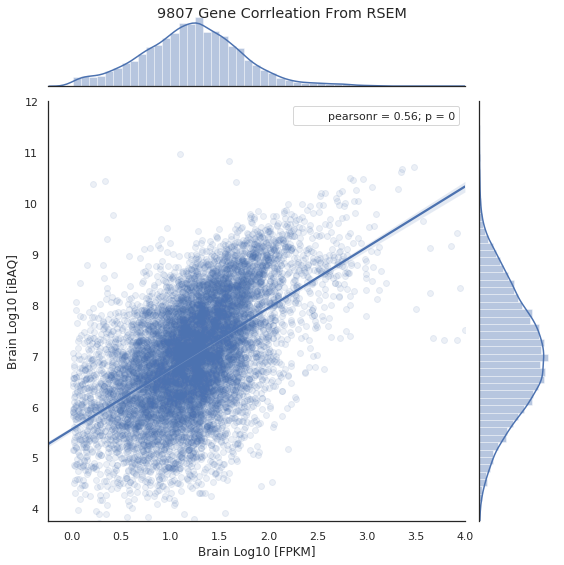

In [99]:
x = np.log10(brain_rna_RSEM[RSEM_genes])
y = np.log10(brain_protein[RSEM_genes])
df= pd.concat([x, y], axis=1,)
df.columns = ['Brain Log10 [FPKM]','Brain Log10 [iBAQ]']


g = sns.jointplot("Brain Log10 [FPKM]", "Brain Log10 [iBAQ]", xlim=(-.25,4),ylim=(3.75,12),data=df,height=8, kind="reg",scatter_kws={'alpha':0.1})
g.annotate(stats.pearsonr)
g.fig.suptitle('9807 Gene Corrleation From RSEM')
g.savefig('Brain_RSEM_cor')
plt.show()